In [36]:
import numpy as np
import keras

In [37]:
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense
from keras.models import Sequential

# Images fed into this model are 512 x 512 pixels with 3 channels
img_shape = (28,28,1)

# Set up model
model = Sequential()

# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,3,input_shape=img_shape))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Conv2D(12,3))

model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10))

model.add(Activation('softmax'))

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 activation_12 (Activation)  (None, 26, 26, 6)         0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 12)        660       
                                                                 
 activation_13 (Activation)  (None, 11, 11, 12)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 12)          0         
 g2D)                                                 

In [39]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = keras.optimizers.legacy.Adam(), metrics=['acc'])

In [40]:
from keras.datasets import mnist

In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
x_train = np.expand_dims(x_train,-1)

In [44]:
x_test = np.expand_dims(x_test,-1)

In [45]:
x_train.shape

(60000, 28, 28, 1)

In [46]:
y_train.shape

(60000,)

In [47]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6049 - acc: 0.8750 - val_loss: 0.2007 - val_acc: 0.9481
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1446 - acc: 0.9588 - val_loss: 0.1166 - val_acc: 0.9677
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0927 - acc: 0.9717 - val_loss: 0.0832 - val_acc: 0.9756
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0743 - acc: 0.9777 - val_loss: 0.0703 - val_acc: 0.9780
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0637 - acc: 0.9797 - val_loss: 0.0713 - val_acc: 0.9790
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0579 - acc: 0.9817 - val_loss: 0.0591 - val_acc: 0.9828
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0539 - acc: 0.9833 - val_loss: 0.0528 - val_acc: 0.9845
Epoch 8/10
1875/1875 [==============================] - 3s 1ms

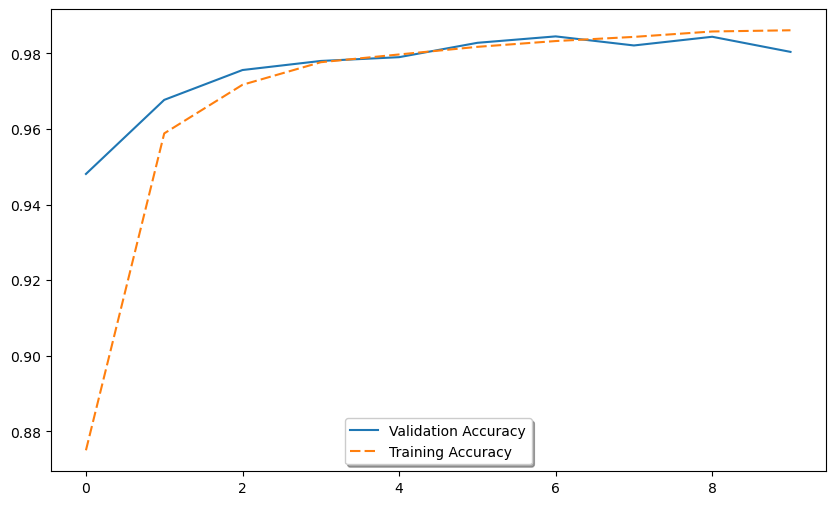

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()

In [49]:
history.history

{'loss': [1.604891061782837,
  0.1445588320493698,
  0.09269608557224274,
  0.07434343546628952,
  0.0636630579829216,
  0.05790429189801216,
  0.053897079080343246,
  0.04862499609589577,
  0.04582495987415314,
  0.04417536035180092],
 'acc': [0.8749833106994629,
  0.9588333368301392,
  0.9717000126838684,
  0.9776666760444641,
  0.9797166585922241,
  0.9817333221435547,
  0.9832666516304016,
  0.9843666553497314,
  0.98580002784729,
  0.9861166477203369],
 'val_loss': [0.2006569653749466,
  0.11662891507148743,
  0.0831621065735817,
  0.0703481063246727,
  0.07133454084396362,
  0.05910598859190941,
  0.05280456691980362,
  0.06021801754832268,
  0.05182744190096855,
  0.06479313224554062],
 'val_acc': [0.9480999708175659,
  0.9677000045776367,
  0.975600004196167,
  0.9779999852180481,
  0.9789999723434448,
  0.9828000068664551,
  0.984499990940094,
  0.9821000099182129,
  0.9843999743461609,
  0.980400025844574]}

## Regularization

In [50]:
from keras.regularizers import l2

# Set up model
model = Sequential()

# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,3,input_shape=img_shape, kernel_regularizer=l2(0.01)))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Conv2D(12,3,activity_regularizer=l2(0.01)))

model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [53]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = keras.optimizers.legacy.Adam(), metrics=['acc'])

In [54]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 144.8255 - acc: 0.6769 - val_loss: 2.4615 - val_acc: 0.8062
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5681 - acc: 0.8307 - val_loss: 1.0778 - val_acc: 0.8640
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9135 - acc: 0.8680 - val_loss: 0.7380 - val_acc: 0.8883
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6685 - acc: 0.8929 - val_loss: 0.5552 - val_acc: 0.9113
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5224 - acc: 0.9124 - val_loss: 0.4364 - val_acc: 0.9291
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4249 - acc: 0.9263 - val_loss: 0.3753 - val_acc: 0.9360
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3536 - acc: 0.9371 - val_loss: 0.3051 - val_acc: 0.9504
Epoch 8/10
1875/1875 [==============================] - 3s 2

# Dropout

In [55]:
from keras.layers import Dropout


model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [56]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = keras.optimizers.legacy.Adam(), metrics=['acc'])

In [57]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10


2023-11-22 20:49:12.128626: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 4s 2ms/step - loss: 4.2475 - acc: 0.6819 - val_loss: 0.2712 - val_acc: 0.9177
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3557 - acc: 0.8863 - val_loss: 0.1395 - val_acc: 0.9601
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2377 - acc: 0.9244 - val_loss: 0.1037 - val_acc: 0.9692
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1783 - acc: 0.9426 - val_loss: 0.0787 - val_acc: 0.9757
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1520 - acc: 0.9513 - val_loss: 0.0718 - val_acc: 0.9784
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1291 - acc: 0.9602 - val_loss: 0.0639 - val_acc: 0.9810
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1215 - acc: 0.9625 - val_loss: 0.0649 - val_acc: 0.9797
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - los

In [58]:
from keras.layers import BatchNormalization


model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [59]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = keras.optimizers.legacy.Adam(), metrics=['acc'])

In [60]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1947 - acc: 0.9427 - val_loss: 0.0690 - val_acc: 0.9780
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0691 - acc: 0.9790 - val_loss: 0.0593 - val_acc: 0.9819
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0549 - acc: 0.9826 - val_loss: 0.0506 - val_acc: 0.9836
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0471 - acc: 0.9856 - val_loss: 0.0477 - val_acc: 0.9838
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0421 - acc: 0.9866 - val_loss: 0.0446 - val_acc: 0.9857
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0374 - acc: 0.9880 - val_loss: 0.0463 - val_acc: 0.9850
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0352 - acc: 0.9884 - val_loss: 0.0427 - val_acc: 0.9857
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

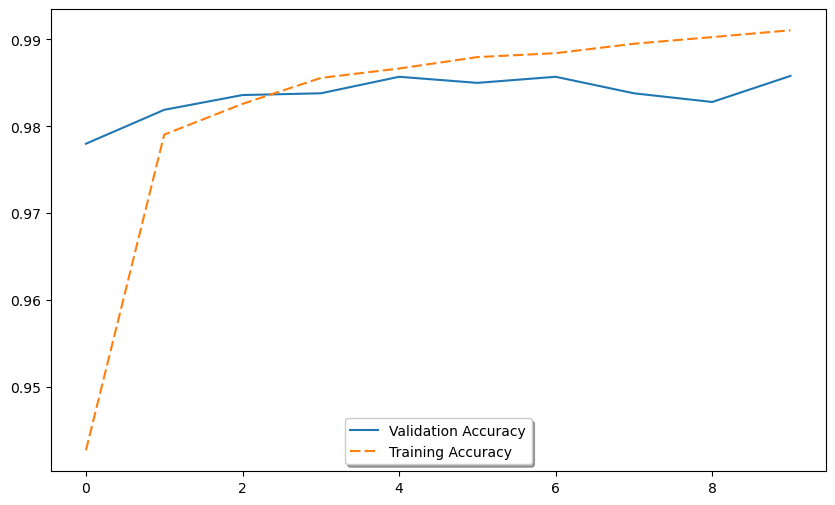

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()